# Problem Statement



<html> <font color = Darkblue>
The purpose is to predict whether the Pima Indian women shows signs of diabetes or not. We are using a dataset collected by "National Institute of Diabetes and Digestive and Kidney Diseases" which consists of a number of attributes which would help us to perform this prediction. A brief description of the attributes is given here below: 
    
<br> Preg: Number of times pregnant
<br> Plas: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
<br> Pres: Diastolic blood pressure (mm Hg)
<br> skin: Triceps skin fold thickness (mm)
<br> test: 2-Hour serum insulin (mu U/ml)
<br> mass: Body mass index (weight in kg/(height in m)^2)
<br> pedi: Diabetes pedigree function
<br> age: Age (years)
<br> class: Class variable (0 or 1)

</font>
</html>

<html>
<font color = blue>
<b>Constraints on data collection </b>

</font>
</html>

<html> <font color = Darkblue>
All patients whose data has been collected are females at least 21 years old of Pima Indian heritage
</font>
</html>

In [154]:
#Import all the necessary modules
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

# Q1. Load the PIMA Indian Diabetes file into Python DataFrame. 


In [85]:
data_df=pd.read_csv('C:\AIML\Supervised learning\lab\pima-indians-diabetes.csv')

It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. You would notice that it is a comma separated file.

# Q2. Print 10 samples from the dataset

In [86]:
print(data_df.head(10))


   Preg  Plas  Pres  skin  test  mass   pedi  age  class
0     6   148    72    35     0  33.6  0.627   50      1
1     1    85    66    29     0  26.6  0.351   31      0
2     8   183    64     0     0  23.3  0.672   32      1
3     1    89    66    23    94  28.1  0.167   21      0
4     0   137    40    35   168  43.1  2.288   33      1
5     5   116    74     0     0  25.6  0.201   30      0
6     3    78    50    32    88  31.0  0.248   26      1
7    10   115     0     0     0  35.3  0.134   29      0
8     2   197    70    45   543  30.5  0.158   53      1
9     8   125    96     0     0   0.0  0.232   54      1


# Q3 Print the datatypes of each column and the shape of the dataset 

In [87]:
# print data types
print(data_df.dtypes)
#Shape of data
print(data_df.shape)
#info of the data
data_df.info()

Preg       int64
Plas       int64
Pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object
(768, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Preg     768 non-null int64
Plas     768 non-null int64
Pres     768 non-null int64
skin     768 non-null int64
test     768 non-null int64
mass     768 non-null float64
pedi     768 non-null float64
age      768 non-null int64
class    768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [88]:
data_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Preg,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Plas,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
Pres,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
skin,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
test,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
mass,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
pedi,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


There are '0's in the data. Are they really valid '0's or they are missing values?
Plasma, BP, skin thickness etc. these values cannot be 0.
look at column by column logically to understand this.


# Q4 Replace all the 0s in the column with the median of the same column value accordingly.

In [105]:
data_df.iloc[:,1:8]=data_df.iloc[:,1:8].replace(0,np.nan)
print(data_df.head(10))
print(data_df.median())
data_df = data_df.apply(lambda x: x.fillna(x.median()),axis=0)
data_df.head()

   Preg   Plas  Pres  skin   test  mass   pedi  age  class
0     6  148.0  72.0  35.0  125.0  33.6  0.627   50      1
1     1   85.0  66.0  29.0  125.0  26.6  0.351   31      0
2     8  183.0  64.0  29.0  125.0  23.3  0.672   32      1
3     1   89.0  66.0  23.0   94.0  28.1  0.167   21      0
4     0  137.0  40.0  35.0  168.0  43.1  2.288   33      1
5     5  116.0  74.0  29.0  125.0  25.6  0.201   30      0
6     3   78.0  50.0  32.0   88.0  31.0  0.248   26      1
7    10  115.0  72.0  29.0  125.0  35.3  0.134   29      0
8     2  197.0  70.0  45.0  543.0  30.5  0.158   53      1
9     8  125.0  96.0  29.0  125.0  32.3  0.232   54      1
Preg       3.0000
Plas     117.0000
Pres      72.0000
skin      29.0000
test     125.0000
mass      32.3000
pedi       0.3725
age       29.0000
class      0.0000
dtype: float64


,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


# Q5 Print the descriptive statistics of each & every column using describe() function

In [107]:
data_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Preg,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Plas,768.0,121.656250,30.438286,44.000,99.75000,117.0000,140.25000,199.00
Pres,768.0,72.386719,12.096642,24.000,64.00000,72.0000,80.00000,122.00
skin,768.0,29.108073,8.791221,7.000,25.00000,29.0000,32.00000,99.00
test,768.0,140.671875,86.383060,14.000,121.50000,125.0000,127.25000,846.00
mass,768.0,32.455208,6.875177,18.200,27.50000,32.3000,36.60000,67.10
pedi,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


# Q6 See the distribution of 'Class' variable and plot it using appropriate graph.

class
0    500
1    268
Name: class, dtype: int64


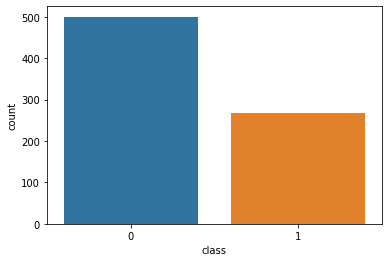

In [130]:
import seaborn as sns
print(data_df.groupby(by='class')['class'].count())
sns.countplot(data_df['class'])

#Just for your understanding - Using univariate analysis check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations (any two attributes). Its an optional step and will not be graded.

# Q7. Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables 


Using the plot - infer the relationship between different variables

C:\Users\gagan\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\gagan\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


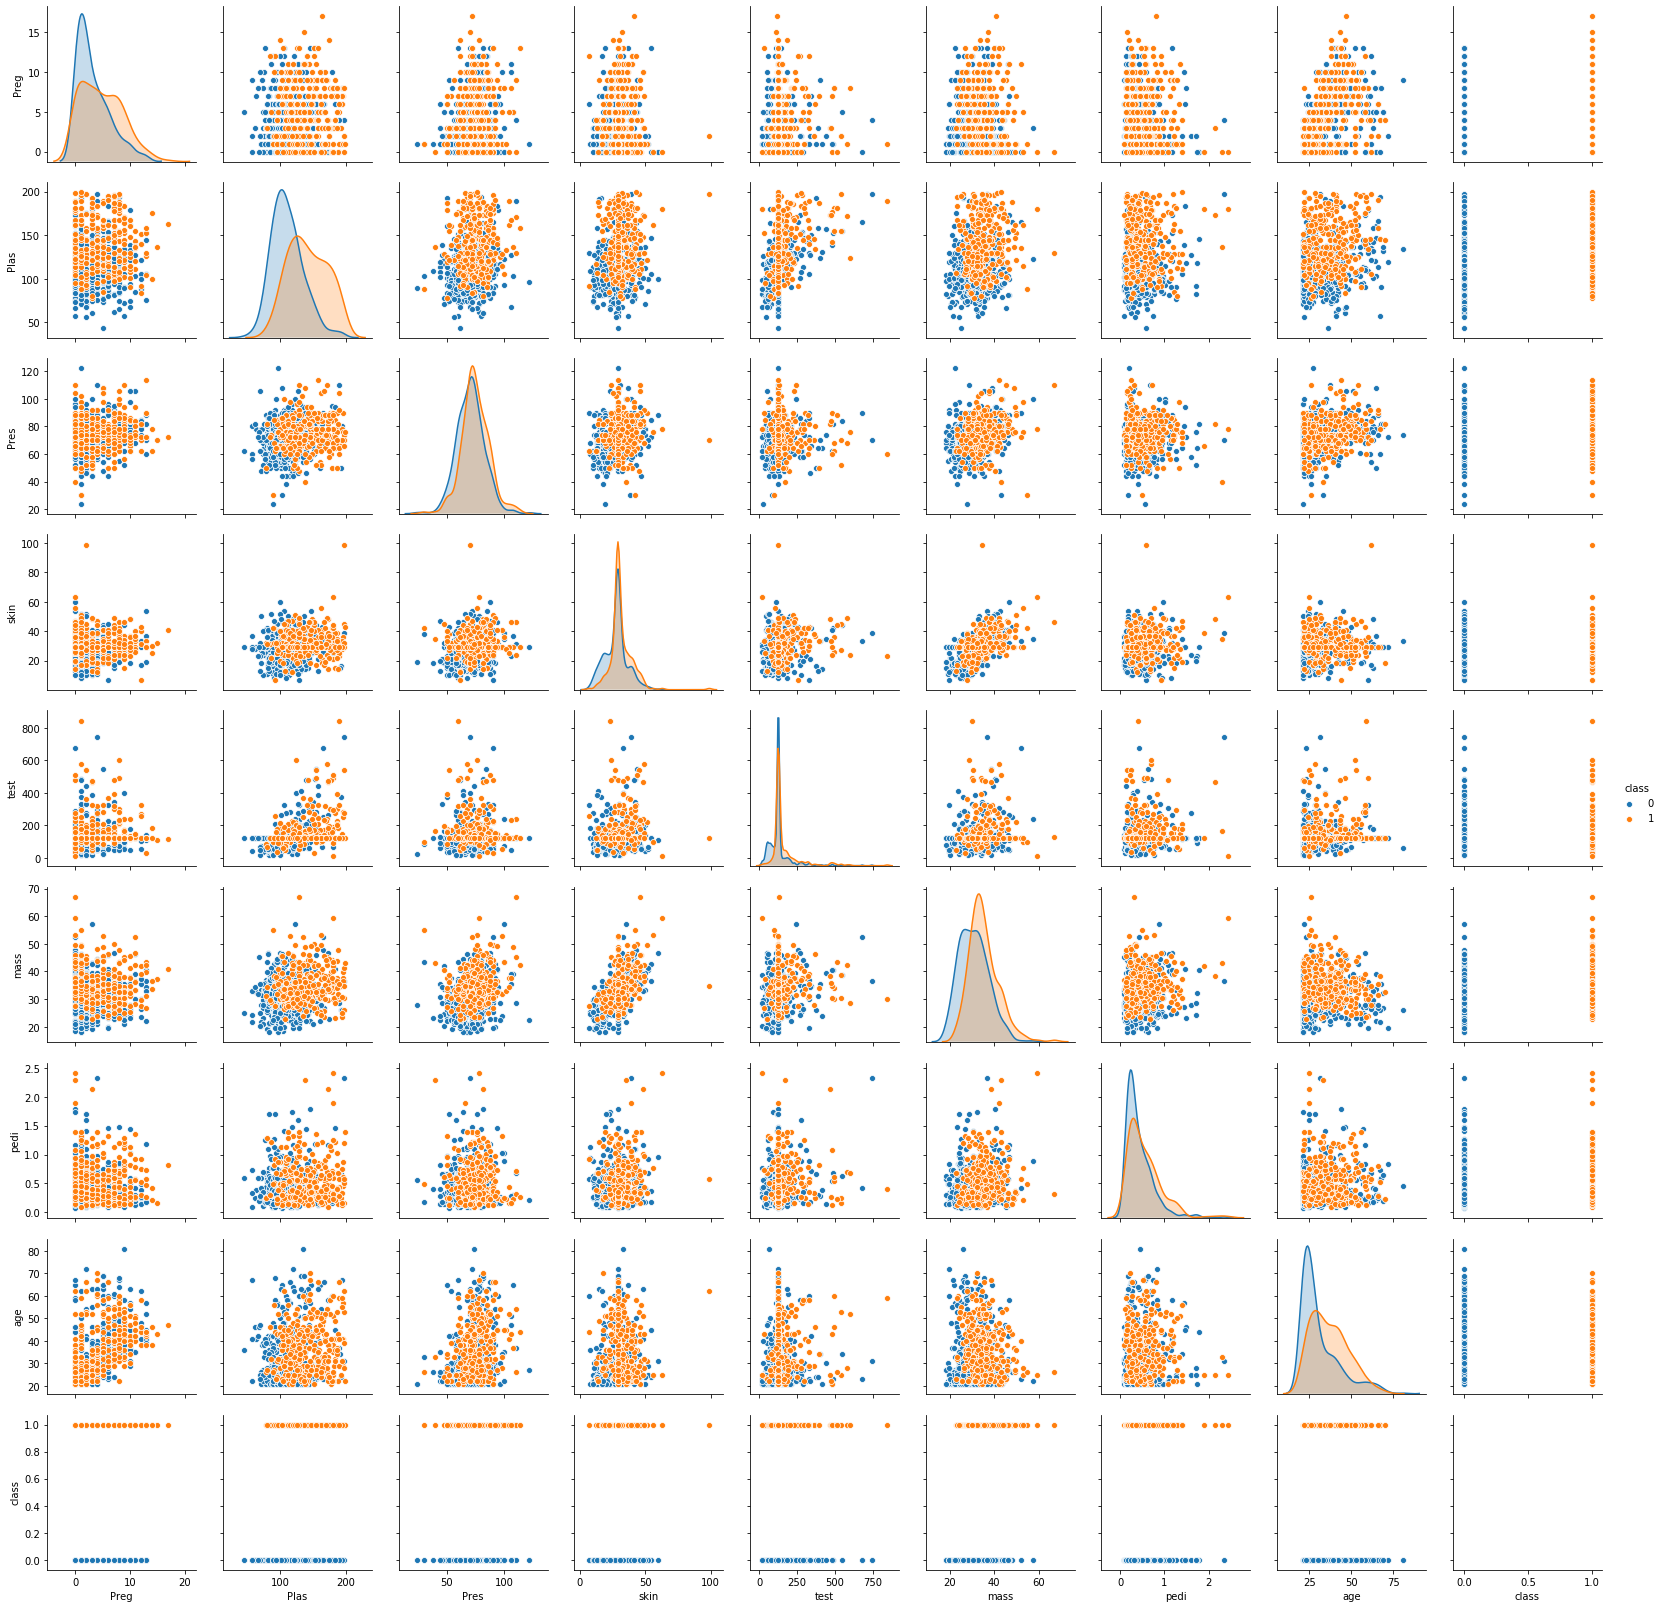

In [132]:
sns.pairplot(data_df,hue='class')

In [174]:
data_df.corr()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
Preg,1.000000,0.128213,0.208615,0.081770,0.025047,0.021559,-0.033523,0.544341,0.221898
Plas,0.128213,1.000000,0.218937,0.192615,0.419451,0.231049,0.137327,0.266909,0.492782
Pres,0.208615,0.218937,1.000000,0.191892,0.045363,0.281257,-0.002378,0.324915,0.165723
skin,0.081770,0.192615,0.191892,1.000000,0.155610,0.543205,0.102188,0.126107,0.214873
test,0.025047,0.419451,0.045363,0.155610,1.000000,0.180241,0.126503,0.097101,0.203790
mass,0.021559,0.231049,0.281257,0.543205,0.180241,1.000000,0.153438,0.025597,0.312038
pedi,-0.033523,0.137327,-0.002378,0.102188,0.126503,0.153438,1.000000,0.033561,0.173844
age,0.544341,0.266909,0.324915,0.126107,0.097101,0.025597,0.033561,1.000000,0.238356
class,0.221898,0.492782,0.165723,0.214873,0.203790,0.312038,0.173844,0.238356,1.000000


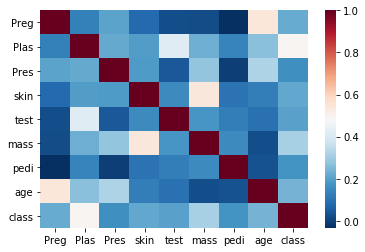

In [173]:
sns.heatmap(data_df.corr(),cmap = "RdBu_r")

None of the features are strong differentiaters individually for class
however  Plasma glucose,mass body index and age are most significant

# Q8 Split the pima_df into training and test set in the ratio of 70:30 (Training:Test).</b>


In [151]:
X=data_df.iloc[:,0:8]
y = data_df.iloc[:,8] 
test_size = 0.30
seed = 1 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

# Q9 Create the decision tree model using “entropy” method of reducing the entropy and fit it to training data.</b>



In [152]:
dt_model = DecisionTreeClassifier(criterion = 'entropy' )
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

# Q10 Print the accuracy of the model & print the confusion matrix 

In [166]:
print('The accuracy is %.3f'%dt_model.score(X_test , y_test))
y_predict = dt_model.predict(X_test)
print('confusion matrix : \n',metrics.confusion_matrix(y_test, y_predict))

The accuracy is 0.784
confusion matrix : 
 [[117  29]
 [ 21  64]]


Print the feature importance of the decision model - Optional